In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("MIMU_STATEREGION.xlsx",sheetname=2)

In [4]:
df[-10:]

,SR_Pcode,State_Region,D_Pcode,District,TS_Pcode,Township,Township_Mya_MM3,MYAINFO_TS_ID,Source,Remark
346,MMR017,Ayeyarwady,MMR017D006,Pyapon,MMR017025,Kyaiklat,ကျိုက်လတ်,ASIMMR017025,"GAD, Mar 2015",NaN
347,MMR017,Ayeyarwady,MMR017D006,Pyapon,MMR017026,Dedaye,ဒေးဒရဲ,ASIMMR017026,"GAD, Mar 2015",NaN
348,MMR018,Nay Pyi Taw,MMR018D001,Oke Ta Ra,MMR018001,Zay Yar Thi Ri,ဇေယျာသီရိ,ASIMMR010033,"GAD, Mar 2015",NaN
349,MMR018,Nay Pyi Taw,MMR018D002,Det Khi Na,MMR018002,Za Bu Thi Ri,ဇမ္ဗူသီရိ,ASIMMR010036,"GAD, Mar 2015",NaN
350,MMR018,Nay Pyi Taw,MMR018D001,Oke Ta Ra,MMR018003,Tatkon,တပ်ကုန်း,ASIMMR010025,"GAD, Mar 2015",NaN
351,MMR018,Nay Pyi Taw,MMR018D002,Det Khi Na,MMR018004,Det Khi Na Thi Ri,ဒက္ခိဏသီရိ,ASIMMR010037,"GAD, Mar 2015",NaN
352,MMR018,Nay Pyi Taw,MMR018D001,Oke Ta Ra,MMR018005,Poke Ba Thi Ri,ပုဗ္ဗသီရိ,ASIMMR010034,"GAD, Mar 2015",NaN
353,MMR018,Nay Pyi Taw,MMR018D002,Det Khi Na,MMR018006,Pyinmana,ပျဉ်းမနား,ASIMMR010026,"GAD, Mar 2015",NaN
354,MMR018,Nay Pyi Taw,MMR018D002,Det Khi Na,MMR018007,Lewe,လယ်ဝေး,ASIMMR010027,"GAD, Mar 2015",NaN
355,MMR018,Nay Pyi Taw,MMR018D001,Oke Ta Ra,MMR018008,Oke Ta Ra Thi Ri,ဥတ္တရသီရိ,ASIMMR010035,"GAD, Mar 2015",NaN


In [5]:
df.columns

Index([u'SR_Pcode', u'State_Region', u'D_Pcode', u'District', u'TS_Pcode',
       u'Township', u'Township_Mya_MM3', u'MYAINFO_TS_ID', u'Source',
       u'Remark'],
      dtype='object')

In [6]:
state_ship = df.loc[:,['State_Region','Township']]

In [7]:
grouped = state_ship.groupby("State_Region")

In [8]:
to_plot = grouped.apply(lambda x : x['Township'].count())

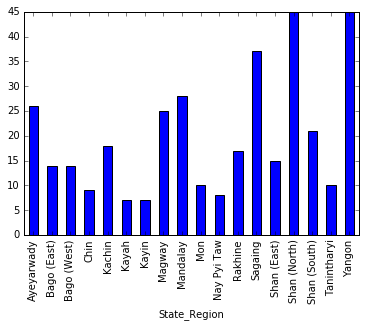

In [9]:
to_plot.plot("bar")

In [10]:
from collections import defaultdict

In [11]:
result_json = defaultdict(list)

In [12]:
for name,group in grouped:
    result_json[name].append(group)

In [13]:
stats = grouped.apply(lambda x : x['Township'])

In [14]:
aya =stats['Ayeyarwady']

In [15]:
type(stats)

pandas.core.series.Series

In [16]:
stats[u'Ayeyarwady'].values

array([u'Pathein', u'Kangyidaunt', u'Thabaung', u'Ngapudaw', u'Kyonpyaw',
       u'Yegyi', u'Kyaunggon', u'Hinthada', u'Zalun', u'Lemyethna',
       u'Myanaung', u'Kyangin', u'Ingapu', u'Myaungmya', u'Einme',
       u'Labutta', u'Wakema', u'Mawlamyinegyun', u'Maubin', u'Pantanaw',
       u'Nyaungdon', u'Danubyu', u'Pyapon', u'Bogale', u'Kyaiklat',
       u'Dedaye'], dtype=object)

In [17]:
x = stats['Ayeyarwady']

In [18]:
state_region_dict = defaultdict(list)

In [19]:
for indx in grouped.indices.keys():
    state_region_dict[indx] = list(stats[indx].values)

In [20]:
state_region_dict['Mandalay']

[u'Aungmyaythazan',
 u'Chanayethazan',
 u'Mahaaungmyay',
 u'Chanmyathazi',
 u'Pyigyitagon',
 u'Amarapura',
 u'Patheingyi',
 u'Pyinoolwin',
 u'Madaya',
 u'Singu',
 u'Mogoke',
 u'Thabeikkyin',
 u'Kyaukse',
 u'Sintgaing',
 u'Myittha',
 u'Tada-U',
 u'Myingyan',
 u'Taungtha',
 u'Natogyi',
 u'Kyaukpadaung',
 u'Ngazun',
 u'Nyaung-U',
 u'Yamethin',
 u'Pyawbwe',
 u'Meiktila',
 u'Mahlaing',
 u'Thazi',
 u'Wundwin']

In [21]:
import json

In [22]:
result = json.dumps(state_region_dict)

In [23]:
f = open("state_region.json",'w')

In [24]:
f.write(result)